## Airbnb 2019 New York EDA with Matplotlib, Seaborn and Plotly

### Import libs

In [3]:
import numpy as np #linear algebra
import pandas as pd #data processing, .csv file I/O
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import missingno as msno
import networkx as nx
import os
from pandas.plotting import parallel_coordinates
from matplotlib_venn import venn2
from plotly.offline import plot
%matplotlib inline


### Import datas

In [4]:
airbnb = pd.read_csv("./AB_NYC_2019.csv")
iris = pd.read_csv("./Iris.csv")
#drop pointless columns
airbnb.drop(["calculated_host_listings_count", "availability_365"], axis=1, inplace=True)
iris.drop(["Id"], axis=1, inplace=True)

### missingno

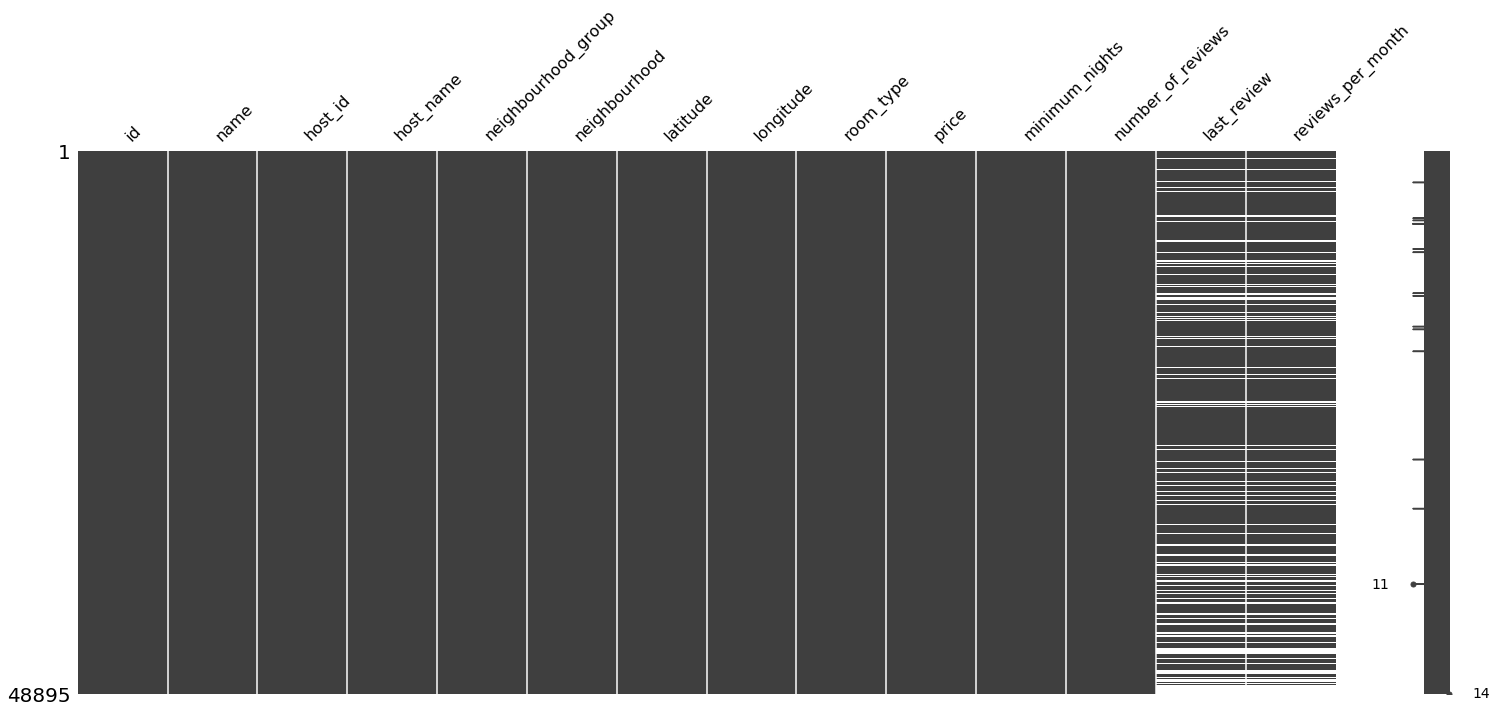

In [5]:
x = {
    "column1" : [1, 2, 3, 5, 121, 121, np.nan, 231, np.nan],
    "column2" : [3, 12, 231, np.nan, np.nan, np.nan, 1231, np.nan, 123123]
}

df = pd.DataFrame(x)

msno.matrix(airbnb)

plt.show()


### parallel_coordinates

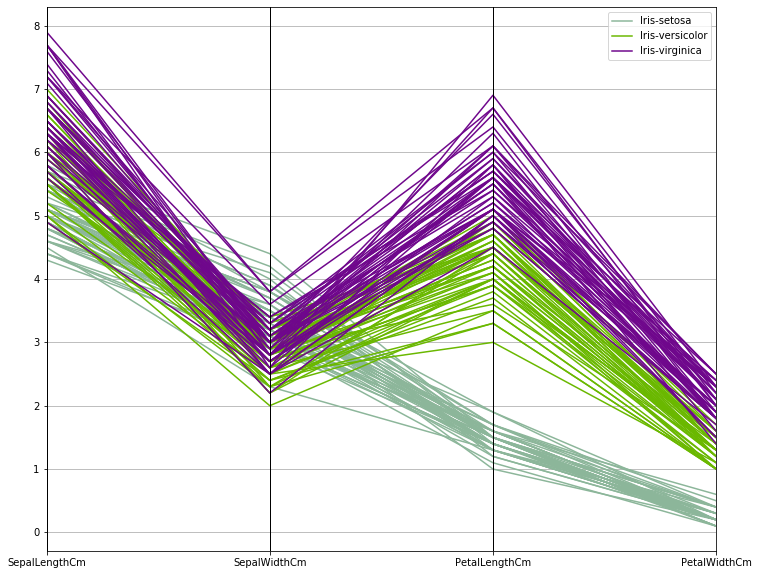

In [6]:
fig = plt.figure(figsize=(12, 10))
parallel_coordinates(iris, "Species")
fig.show()

### Network charts

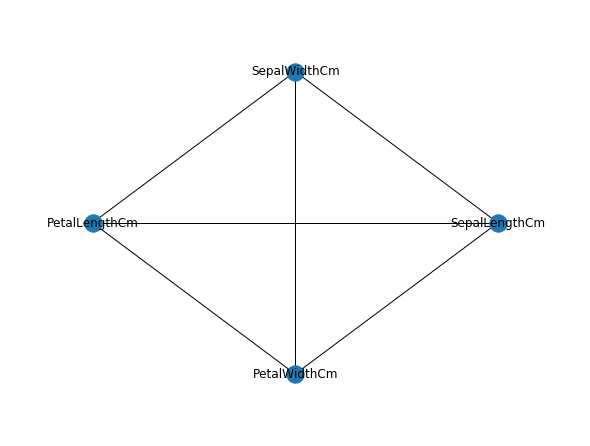

In [7]:
#get numerical columns
df = iris.iloc[:, 0:4]

#define bottom limit for correlations
threshold = -1

#we need links between these numerical columns so stack corr()
linked_df = df.corr().stack().reset_index()
linked_df.columns = ["feature1", "feature2", "value"]

#remove own link matchs and get values more than threshold
filtered_linked_df = linked_df[(linked_df["value"] >= threshold) & (linked_df["feature1"] != linked_df["feature2"])]

#define network Graph
G = nx.from_pandas_edgelist(filtered_linked_df, "feature1", "feature2")

#visualize network graph
fig = plt.figure(figsize=(8, 6))
nx.draw_circular(G, with_labels=True)
plt.margins(0.2, 0.2)
fig.show()

### Venn diagrams

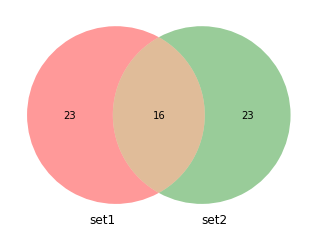

In [8]:
venn2(subsets=(23, 23, 16), set_labels=("set1", "set2"))

### Donut plot

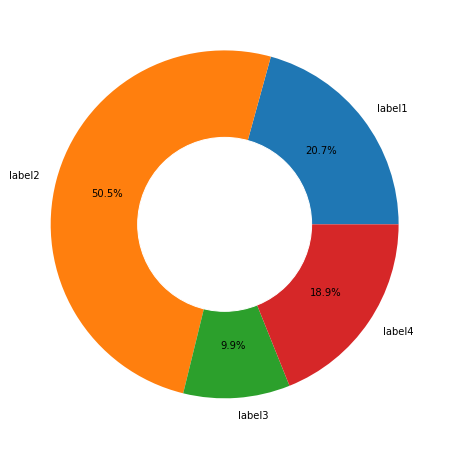

In [9]:
sizes = [23, 56, 11, 21]

donut = plt.Circle((0, 0), 0.5, color="white")
fig = plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=["label1", "label2", "label3", "label4"], autopct="%1.1f%%", pctdistance=0.7)
f = plt.gcf()
f.gca().add_artist(donut)
fig.show()

### Spider Chart

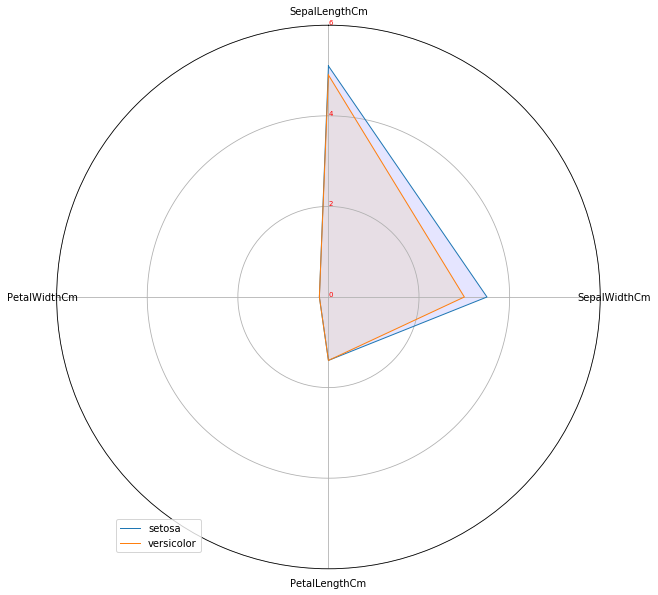

In [10]:
categories = list(iris)[:4]
N = len(categories)
pi = np.pi
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = iris.loc[0].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = iris.loc[1].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

### Cluster map

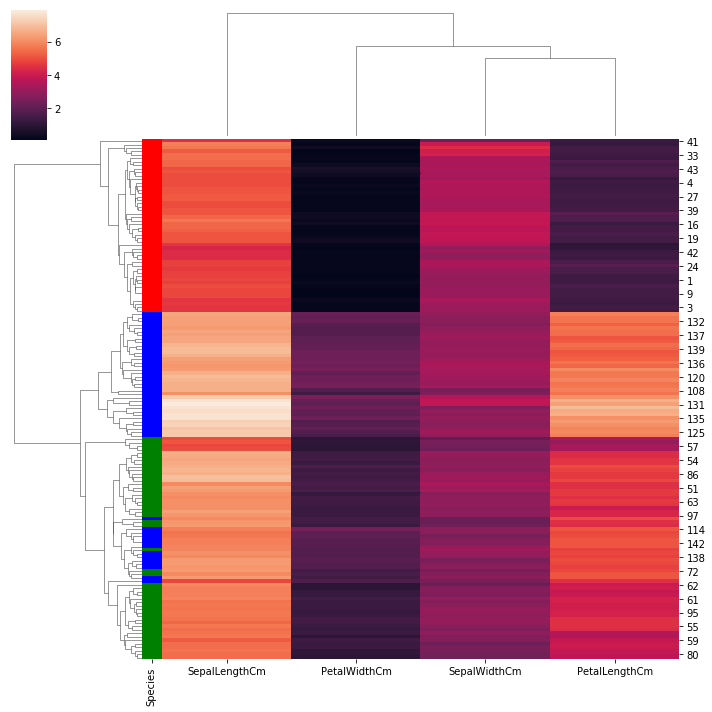

In [11]:
x = iris.iloc[:, 0:4]
s = iris.Species.unique()
color_match = dict(zip(s, "rgb"))
row_colors = iris.Species.map(color_match)
sns.clustermap(x, row_colors = row_colors)


### Inset plots(Plotly)

In [12]:
trace0 = go.Histogram(
    x=iris.SepalLengthCm,
    name="Sepal Length(cm)",
    opacity=0.65
)

trace1 = go.Scatter(
    x=iris.index,
    y=iris.SepalLengthCm,
    mode="markers",
    marker=dict(
        color="darkgreen",
        size=4
    ),
    xaxis="x2",
    yaxis="y2",
    name="Sepal Length(cm)"
)

fig = go.Figure()

fig.add_traces([trace0, trace1])
fig.update_layout(
    xaxis2=dict(
        domain=[0.7, 1],
        anchor="y2"
    ),
    yaxis2=dict(
        domain=[0.7, 1],
        anchor="x2"
    )
)

fig.show()

### 3D Scatter plot(plotly)

In [13]:
setosa = iris[iris["Species"] == "Iris-setosa"]
virginica = iris[iris["Species"] == "Iris-virginica"]

trace0 = go.Scatter3d(
    x=setosa.SepalLengthCm,
    y=setosa.SepalWidthCm,
    z=setosa.PetalLengthCm,
    mode="markers",
    marker=dict(
        size=12,
        line=dict(
            width=0.1,
            color="white"
        )
    ),
    name="setosa"
)
trace1 = go.Scatter3d(
    x=virginica.SepalLengthCm,
    y=virginica.SepalWidthCm,
    z=virginica.PetalLengthCm,
    mode="markers",
    marker=dict(
        size=12,
        line=dict(
            width=0.1,
            color="white"
        )
    ),
    name="virginica"
)

fig = go.Figure()
fig.add_traces([trace0, trace1])
fig.update_layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig.show()

In [14]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [80]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = iris.drop(["Species", "PetalWidthCm"], axis=1)
y = iris.loc[:, "PetalWidthCm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ridge = Ridge(alpha=1) #L2 regularization parameter
lasso = Lasso(alpha=0.00001) #L1 regularization parameter
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
preds = lasso.predict(X_test)
print("ridge accuracy score : {}".format(ridge.score(X_test, y_test)))
print("lasso mean absolute error score : {}".format(mean_absolute_error(preds, y_test)))
print(lasso.coef_)
print(ridge.coef_)



ridge accuracy score : 0.8909049457072135
lasso mean absolute error score : 0.16933507786627497
[-0.19967009  0.20803083  0.52351187]
[-0.16019348  0.17215385  0.50243905]
